In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import sidetable as stb

In [3]:
df = pd.read_csv('Shopping_CustomerData.csv', index_col=['CustomerID'])
df.head()

,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore,CustomerCityID
CustomerID,,,,,,,
1001,Male,49,Bengaluru,527547.58850,653,78,1
1002,Male,59,Bengaluru,207143.19760,630,63,1
1003,Female,54,Delhi,164423.84570,555,69,4
1004,Female,42,Bengaluru,56220.36443,699,30,1
1005,Female,30,Bengaluru,256194.36190,793,6,1


### Question 1:
    Load the Data. Check if any of the columns contain any Null values and remove them. Print the number of 
    columns and their column names - Beginner

In [5]:
#shape of the dataframe
df.shape

(200, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1001 to 1200
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerGender  200 non-null    object 
 1   CustomerAge     200 non-null    int64  
 2   CustomerCity    200 non-null    object 
 3   AnnualIncome    200 non-null    float64
 4   CreditScore     200 non-null    int64  
 5   SpendingScore   200 non-null    int64  
 6   CustomerCityID  200 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 12.5+ KB


In [7]:
df.stb.missing()

,missing,total,percent
CustomerGender,0,200,0.0
CustomerAge,0,200,0.0
CustomerCity,0,200,0.0
AnnualIncome,0,200,0.0
CreditScore,0,200,0.0
SpendingScore,0,200,0.0
CustomerCityID,0,200,0.0


In [8]:
df.isna().any()

CustomerGender    False
CustomerAge       False
CustomerCity      False
AnnualIncome      False
CreditScore       False
SpendingScore     False
CustomerCityID    False
dtype: bool

### Question 2: 
    Calculate Measures of Central Tendency - Mean, Median, and Mode for the Annuallncome column and print 
    their values- Beginner

In [21]:
print(df['AnnualIncome'].agg(['mean','median']))
print(f"mode: {df['AnnualIncome'].mode()[0]}")

mean      285143.931646
median    263418.505550
Name: AnnualIncome, dtype: float64
mode: 2577.057456


In [27]:
df.stb.freq(cols=['AnnualIncome']).head(1)

,AnnualIncome,count,percent,cumulative_count,cumulative_percent
0,695407.0917,1,0.5,1,0.5


In [29]:
df.head()

,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore,CustomerCityID
CustomerID,,,,,,,
1001,Male,49,Bengaluru,527547.58850,653,78,1
1002,Male,59,Bengaluru,207143.19760,630,63,1
1003,Female,54,Delhi,164423.84570,555,69,4
1004,Female,42,Bengaluru,56220.36443,699,30,1
1005,Female,30,Bengaluru,256194.36190,793,6,1


### Question 3: 
    Module_ 1_Statistical_Foundations (1) (1) 
    Obtain different summary statistics (Variance, Standard Deviation, and Skewness) for the Spending Score 
    and print their values- Beginner

In [32]:
from scipy.stats import skew
print(f"var of Spending Score: {df['SpendingScore'].var()}")
print(f"std of Spending Score: {df['SpendingScore'].std()}")
print(f"skewness of Spending Score: {skew(df['SpendingScore'])}")

var of Spending Score: 824.9929396984925
std of Spending Score: 28.722690328353515
skewness of Spending Score: 0.10081837365183154


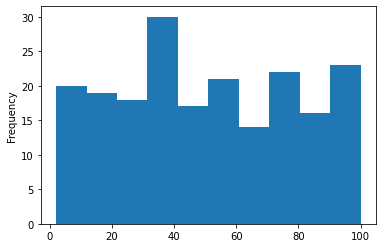

In [33]:
df['SpendingScore'].plot(kind='hist')
plt.show()

### Question 4:
    Detect Outliers based on data in Annuallncome and SpendingScore column using Z-Score - Advanced

In [46]:
from scipy.stats import zscore
zscores = zscore(df['AnnualIncome'])
df = pd.concat([df,pd.Series(zscores, name='AnnualIncomeZScore',index=df.index)],axis=1)

In [47]:
df.shape, zscores.shape

((200, 8), (200,))

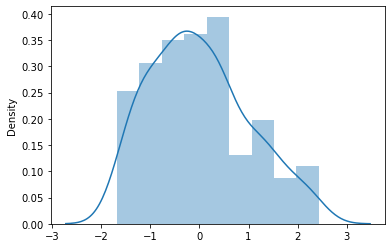

In [48]:
sns.distplot(zscores)
plt.show()

In [52]:
df[(df['AnnualIncomeZScore']>2) | (df['AnnualIncomeZScore']<-2)]

,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore,CustomerCityID,AnnualIncomeZScore
CustomerID,,,,,,,,
1063,Female,39,Bengaluru,675461.7357,849,59,1,2.312233
1066,Male,34,Chennai,625214.1659,632,14,2,2.014567
1115,Female,51,Chennai,687212.7707,553,100,2,2.381846
1149,Female,62,Bengaluru,651534.3098,884,23,1,2.170487
1156,Female,60,Mumbai,671028.1872,605,55,5,2.285969
1167,Male,21,Bengaluru,695407.0917,718,86,1,2.430389
1172,Male,56,Mumbai,648085.0454,605,35,5,2.150054
1178,Male,22,Chennai,634980.9806,844,21,2,2.072426
1195,Female,48,Chennai,630148.5131,833,91,2,2.043798


In [55]:
zscore(df[['AnnualIncome','SpendingScore']])[:2]

array([[ 1.43599311,  0.95267867],
       [-0.46207437,  0.42913296]])

### Question 5: 
    Detect Outliers based on data in CustomerAge and SpendingScore column using Scatter Plot -
    Intermediate 

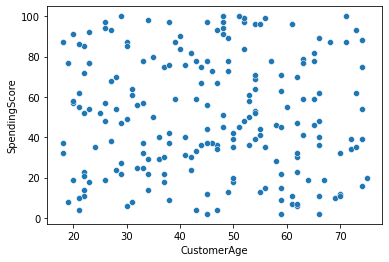

In [57]:
sns.scatterplot('CustomerAge','SpendingScore',data=df)
plt.show()

In [59]:
zscores = zscore(df[['CustomerAge','SpendingScore']])
df = pd.concat([df,pd.DataFrame(zscores,columns=['CustomerAgeZscore','SpendingScoreZscore'],index=df.index)],axis=1)
df.head()

,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore,CustomerCityID,AnnualIncomeZScore,CustoemrAgeZscore,SpendingScoreZscore
CustomerID,,,,,,,,,,
1001,Male,49,Bengaluru,527547.58850,653,78,1,1.435993,0.216509,0.952679
1002,Male,59,Bengaluru,207143.19760,630,63,1,-0.462074,0.838660,0.429133
1003,Female,54,Delhi,164423.84570,555,69,4,-0.715143,0.527584,0.638551
1004,Female,42,Bengaluru,56220.36443,699,30,1,-1.356137,-0.218997,-0.722668
1005,Female,30,Bengaluru,256194.36190,793,6,1,-0.171497,-0.965579,-1.560341


In [65]:
df['CustomerAgeGroup'] = df['CustomerAge'].apply(lambda c: 'Outlier' if abs(c) > 1.5 else 'Not Outlier')
df['SpendingScoreGroup'] = df['SpendingScoreZscore'].apply(lambda c: 'Outlier' if abs(c) > 1.5 else 'Not Outlier')
df.head()

,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore,CustomerCityID,AnnualIncomeZScore,CustoemrAgeZscore,SpendingScoreZscore,CustomerAgeGroup,SpendingScoreGroup
CustomerID,,,,,,,,,,,,
1001,Male,49,Bengaluru,527547.58850,653,78,1,1.435993,0.216509,0.952679,Outlier,Not Outlier
1002,Male,59,Bengaluru,207143.19760,630,63,1,-0.462074,0.838660,0.429133,Outlier,Not Outlier
1003,Female,54,Delhi,164423.84570,555,69,4,-0.715143,0.527584,0.638551,Outlier,Not Outlier
1004,Female,42,Bengaluru,56220.36443,699,30,1,-1.356137,-0.218997,-0.722668,Outlier,Not Outlier
1005,Female,30,Bengaluru,256194.36190,793,6,1,-0.171497,-0.965579,-1.560341,Outlier,Outlier


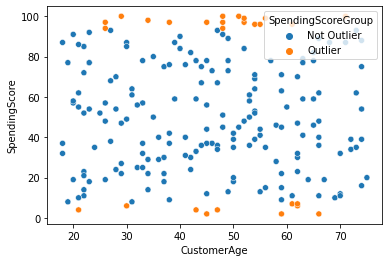

In [66]:
sns.scatterplot('CustomerAge','SpendingScore',data=df, hue='SpendingScoreGroup')
plt.show()